In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'3.3.0'

In [3]:
image = cv2.imread("gen24.1.jpg")
gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray.copy(), 225, 255, cv2.THRESH_BINARY_INV)[1]
#thresh = cv2.threshold(image.copy(), 225, 255, cv2.THRESH_BINARY_INV)[1]

In [4]:
    (_, cnts, hier) = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
x = []
for c in cnts:
    epsilon = 0.1*cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,epsilon,True)
    #if 9999 < cv2.contourArea(approx) < 99999:
    #if 99999 < cv2.contourArea(approx) < 599999:
    #if cv2.contourArea(approx) >= 599999:
    if 99999 < cv2.contourArea(c) < 9999999:
        x.append(c)
len(x)

46

In [6]:
cnt = np.array(x)
img = cv2.drawContours(image.copy(), cnt, -1, (255, 0, 0), 7)

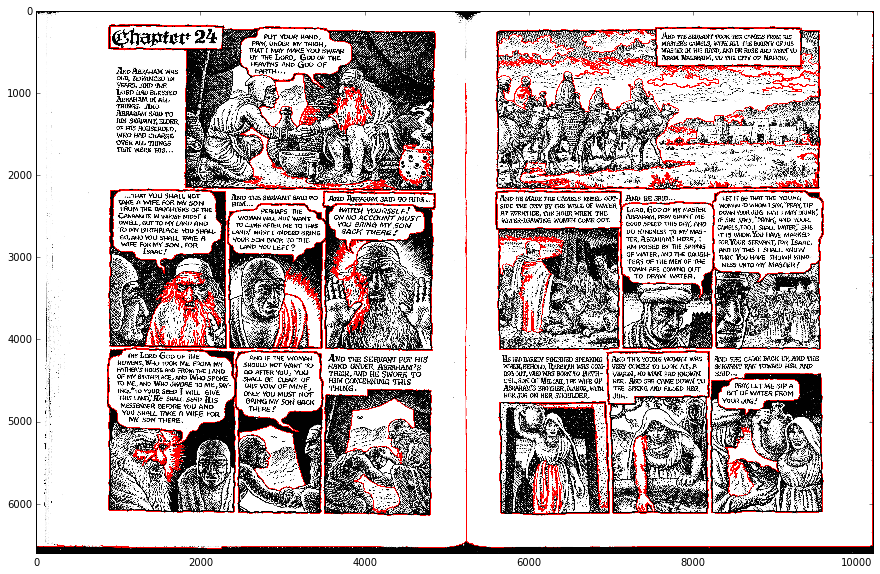

In [7]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.imshow(img)
plt.show()

In [8]:
plt.rcParams['figure.figsize'] = (15, 10)
fig = plt.figure()

def writeFrames(image, x, fig):
  for i in range(len(x)):
    cnt = np.array(x[i])
    img = cv2.drawContours(image.copy(), cnt, -1, (255, 0, 0), 7)
    plt.imshow(img)
    fig.savefig('contours/' + str(i) + '.png')

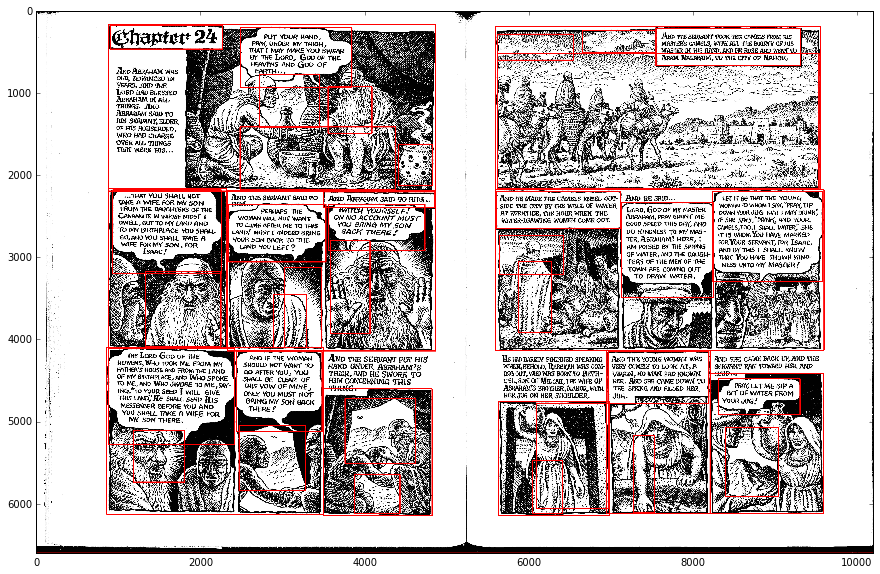

In [9]:
plt.rcParams['figure.figsize'] = (25, 15)
img = image.copy()
for c in cnt:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),12)
plt.imshow(img)
plt.show()

In [13]:
len(hier[0])

249545

In [21]:
hull = cv2.boundingRect(np.array(cnts))

TypeError: points data type = 17 is not supported